In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris=datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print('데이터셋 크기:',iris['target'].shape)
print('데이터셋 내용:',iris['target'])

데이터셋 크기: (150,)
데이터셋 내용: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head() #head는 기본적으로 처음 5개 데이터를 보여줌, (숫자) 로 변경가능

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.columns=['sepal_length','sepal_width','petal_length','petal_width']
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [6]:
df['Target']=iris['target']
print('데이터셋의 크기:',df.shape)
df.head()

데이터셋의 크기: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info() #데이터프레임의 기본 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df.describe() #통계 정보 요약

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.isnull().sum() #결측값 확인
#Tip 결측값은 자료를 수집하는데 실패했거나 정리하는 과정에서 누락되어 유효한 데이터가 없는 경우
#대부분의 머신러닝은 결측값이 있으면 오류가 발생하므로 입력하기 전에 다른 유효한 값으로 대체하거나
#결측값을 삭제하는 별도의 전처리가 필요하다.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

In [10]:
df.duplicated().sum() #중복된 값 확인

1

In [11]:
df.loc[df.duplicated(),:] #중복된 데이터 탐색

,sepal_length,sepal_width,petal_length,petal_width,Target
142,5.8,2.7,5.1,1.9,2


In [12]:
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9),:]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [13]:
df=df.drop_duplicates()
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9),:]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2


In [14]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


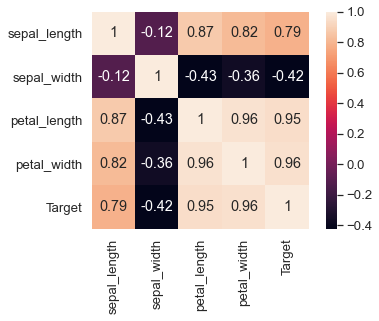

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)  #글자크기 1.2배

sns.heatmap(data=df.corr(),square=True,annot=True,cbar=True)
#square는 모양을 정사각형으로 고정시켜줌,annot이 빠지면 사각형 안에 숫자가 사라짐.cbar은 color bar임
plt.show()

In [16]:
sns.__version__

'0.11.1'

In [17]:
df['Target'].value_counts() #왜 2 1 0 순서로 안나오는지? 2가 가장 최근 수정된 값이라서 그럴거라고 예상

0    50
1    50
2    49
Name: Target, dtype: int64

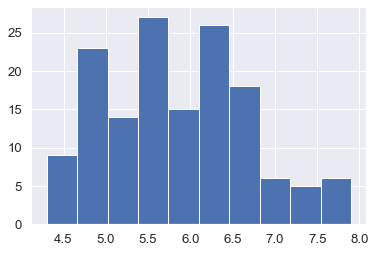

In [18]:
plt.hist(x='sepal_length',data=df)
plt.show()

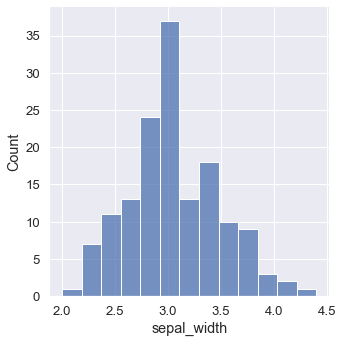

In [19]:
sns.displot(x='sepal_width',kind='hist',data=df)
plt.show()

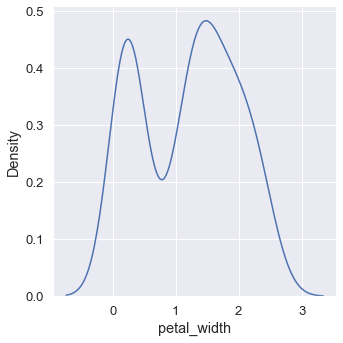

In [20]:
sns.displot(x='petal_width',kind='kde',data=df)
plt.show()

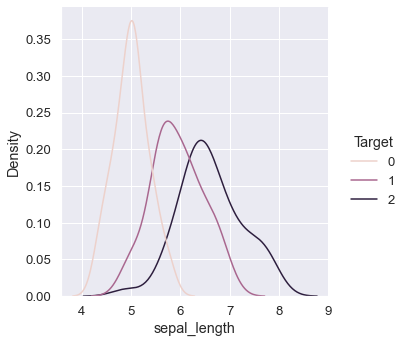

In [21]:
sns.displot(x='sepal_length',hue='Target',kind='kde',data=df) 
plt.show() #hue를 통해서 target을 기준으로 분류

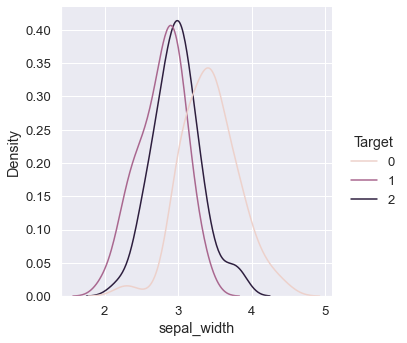

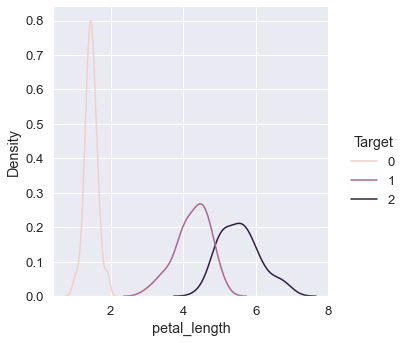

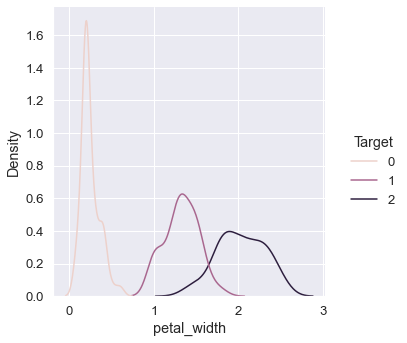

In [22]:
for col in ['sepal_width','petal_length','petal_width']:
    sns.displot(x=col,hue='Target',kind='kde',data=df)
plt.show()

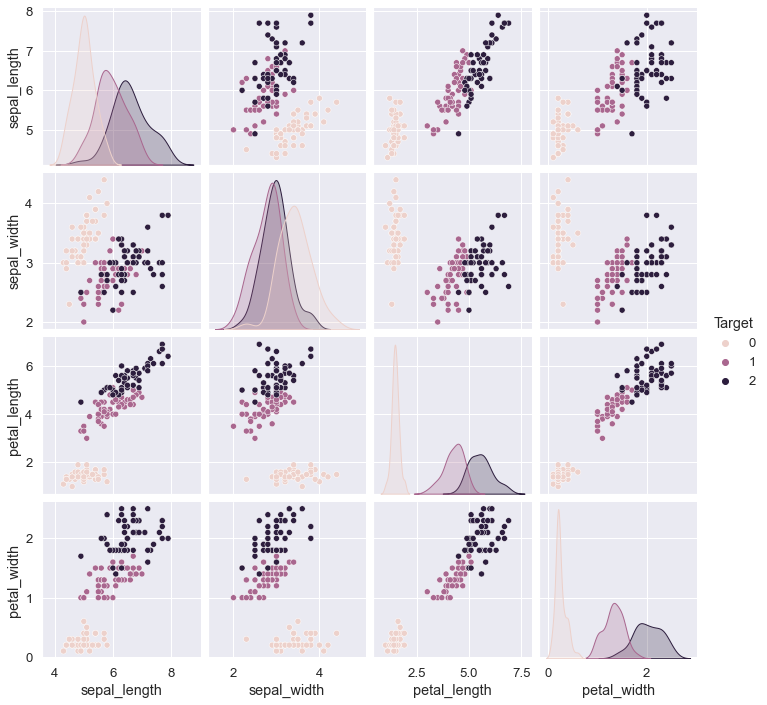

In [23]:
sns.pairplot(df,hue='Target',height=2.5,diag_kind='kde')
plt.show()   #size code 가 height로 update되어서 코드 수정하라고 한다

In [24]:
from sklearn.model_selection import train_test_split

x_data = df.loc[:,'sepal_length':'petal_width']
y_data = df.loc[:,'Target']

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True,random_state=20)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(119, 4) (119,)
(30, 4) (30,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [26]:
y_knn_pred=knn.predict(x_test)
print("예측값:",y_knn_pred[:5])

예측값: [0 1 1 2 1]


In [27]:
from sklearn.metrics import accuracy_score
knn_acc=accuracy_score(y_test,y_knn_pred)
print("Accuracy:%.4f" % knn_acc)

Accuracy:0.9333


In [28]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC()

In [29]:
y_svc_pred=svc.predict(x_test)
print("예측값:",y_svc_pred[:5])
svc_acc=accuracy_score(y_test,y_svc_pred)
print("Accuracy: %.4f"%svc_acc)

예측값: [0 1 1 2 1]
Accuracy: 1.0000


In [30]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()
lrc.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_lrc_pred=lrc.predict(x_test)
print("예측값:",y_lrc_pred[:5])
lrc_acc=accuracy_score(y_test,y_lrc_pred)
print("Accuracy %.4f"%lrc_acc)

예측값: [0 1 1 2 1]
Accuracy 1.0000


In [32]:
y_lrc_prob=lrc.predict_proba(x_test)
y_lrc_prob

array([[9.83094458e-01, 1.69054840e-02, 5.76296333e-08],
       [4.60695615e-03, 8.41458027e-01, 1.53935017e-01],
       [1.03674499e-02, 9.20150901e-01, 6.94816493e-02],
       [2.57653526e-05, 5.16404333e-02, 9.48333801e-01],
       [2.39285809e-02, 9.52024076e-01, 2.40473431e-02],
       [2.93669482e-02, 9.25894878e-01, 4.47381739e-02],
       [4.78594971e-06, 1.77678254e-02, 9.82227389e-01],
       [9.80412565e-01, 1.95873212e-02, 1.13561879e-07],
       [1.22340869e-05, 6.66975005e-02, 9.33290265e-01],
       [9.75406662e-01, 2.45932737e-02, 6.41393285e-08],
       [2.73416875e-05, 2.71305410e-02, 9.72842117e-01],
       [1.71527827e-03, 7.49886906e-01, 2.48397816e-01],
       [7.53070949e-04, 4.91860885e-01, 5.07386045e-01],
       [9.84534292e-01, 1.54656799e-02, 2.81278367e-08],
       [9.76953930e-01, 2.30460066e-02, 6.38290485e-08],
       [1.28093730e-03, 2.60492146e-01, 7.38226916e-01],
       [9.91798182e-01, 8.20180674e-03, 1.12005864e-08],
       [4.15672008e-03, 8.61227

In [33]:
#의사결정 나무
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=3,random_state=20)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=20)

In [35]:
y_dtc_pred=dtc.predict(x_test)
print("예측값:",y_dtc_pred[:5])
dtc_acc=accuracy_score(y_test,y_dtc_pred)
print("Accuracy: %.4f"%dtc_acc)

예측값: [0 1 1 2 1]
Accuracy: 0.9333


In [44]:
from sklearn.ensemble import VotingClassifier
hvc=VotingClassifier(estimators=[('Knn',knn),('SVM',svc),('DT',dtc)],voting='hard')
hvc.fit(x_train,y_train)
y_hvc_pred=hvc.predict(x_test)
print("예측값:",y_hvc_pred[:5])
hvc_acc=accuracy_score(y_test,y_hvc_pred)
print("정확도: %.4f"%hvc_acc)

예측값: [0 1 1 2 1]
정확도: 0.9667


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,max_depth=3,random_state=20)
rfc.fit(x_train,y_train)
y_rfc_pred=rfc.predict(x_test)
print("예측값",y_rfc_pred[:5])
rfc_acc=accuracy_score(y_test,y_rfc_pred)
print('Accuracy: %.4f'%rfc_acc)

예측값 [0 1 1 2 1]
Accuracy: 0.9667


In [50]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(N_estimators=50,max_depth=3,random_state=20)
xgbc.fit(x_train,y_train)
y_xgbc_pred=xgbc.predict(x_test)
print('예측값:',y_xgbc_pred)
xgbc_acc=accuracy_score(y_test,y_xgbc_pred)
print('Accuracy: %.4f'%xgbc_acc)

예측값: [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2]
Accuracy: 0.9667


In [52]:
x_tr,x_val,y_tr,y_val=train_test_split(x_train,y_train,test_size=0.3,shuffle=True,random_state=20)
print(x_tr.shape,y_tr.shape)
print(x_val.shape,y_val.shape)

(83, 4) (83,)
(36, 4) (36,)


In [53]:
rfc=RandomForestClassifier(max_depth=3,random_state=20)
rfc.fit(x_tr,y_tr)
y_tr_pred=rfc.predict(x_tr)
y_val_pred=rfc.predict(x_val)
tr_acc=accuracy_score(y_tr,y_tr_pred)
val_acc=accuracy_score(y_val,y_val_pred)
print('Train Accuracy %.4f' % tr_acc)
print('Validation Accuracy: %.4f' % val_acc)

Train Accuracy 0.9880
Validation Accuracy: 0.9167


In [54]:
y_test_pred=rfc.predict(x_test)
test_acc=accuracy_score(y_test,y_test_pred)
print('Test Accuracy: %.4f'%test_acc)

Test Accuracy: 0.9000


In [56]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=20)
num_fold=1
for tr_idx, val_idx in kfold.split(x_train):
    print("%s Fold-------------------------------------"%num_fold)
    print("훈련:",len(tr_idx),tr_idx[:10])
    print("검증:",len(val_idx),val_idx[:10])
    num_fold+=1

1 Fold-------------------------------------
훈련: 95 [ 0  3  4  6  7  8  9 10 11 12]
검증: 24 [ 1  2  5 35 37 39 47 48 51 53]
2 Fold-------------------------------------
훈련: 95 [ 1  2  3  4  5  6  7  8  9 10]
검증: 24 [ 0 12 19 21 23 31 36 38 44 46]
3 Fold-------------------------------------
훈련: 95 [ 0  1  2  3  5  6  7  9 10 12]
검증: 24 [ 4  8 11 14 24 27 29 30 33 41]
4 Fold-------------------------------------
훈련: 95 [ 0  1  2  4  5  6  7  8  9 11]
검증: 24 [ 3 10 13 17 18 25 32 43 57 58]
5 Fold-------------------------------------
훈련: 96 [ 0  1  2  3  4  5  8 10 11 12]
검증: 23 [ 6  7  9 15 16 20 22 26 28 34]


In [58]:
val_scores=[]
num_fold=1

for tr_idx,val_idx in kfold.split(x_train,y_train):
    x_tr,x_val = x_train.iloc[tr_idx,:],x_train.iloc[val_idx,:]
    y_tr,y_val = y_train.iloc[tr_idx],y_train.iloc[val_idx]
    #학습
    rfc=RandomForestClassifier(max_depth=5,random_state=20)
    rfc.fit(x_tr,y_tr)
    #검증
    y_val_pred=rfc.predict(x_val)
    val_acc=accuracy_score(y_val,y_val_pred)
    print('%d Fold Accuracy %.4f'%(num_fold,val_acc))
    val_scores.append(val_acc)
    num_fold+=1

1 Fold Accuracy 0.8750
2 Fold Accuracy 1.0000
3 Fold Accuracy 0.9167
4 Fold Accuracy 0.9583
5 Fold Accuracy 0.9565


In [59]:
import numpy as np
mean_score=np.mean(val_scores)
print('평균 검증 Accuracy: %.4f'%mean_score)

평균 검증 Accuracy: 0.9413
